In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

## PM10 y PM2.5

In [2]:
pm10 = pd.read_csv('Data//OAB - PM10PM - La Ciudad.csv')
pm10['Periodo'] = pd.to_datetime(pm10['Periodo'])
pm10.columns = ['Periodo', 'pm10']
pm10_c = pm10.tail(105).copy()

In [3]:
pm2_5 = pd.read_csv('Data//OAB - PM25PME - La Ciudad.csv')
pm2_5['Periodo'] = pd.to_datetime(pm2_5['Periodo'])
pm2_5['pm2_5'] = pm2_5.iloc[:,1:].mean(axis=1)

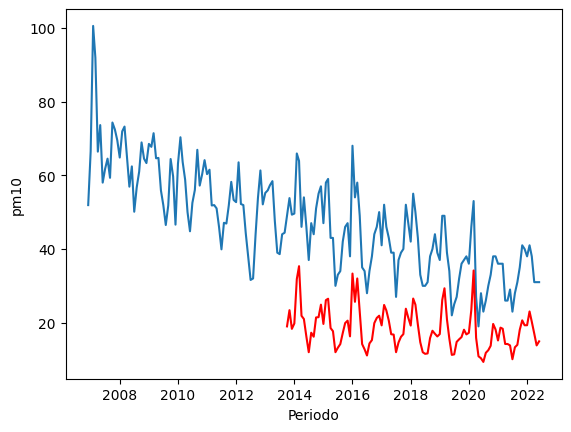

In [4]:
sns.lineplot(data=pm10, x = 'Periodo', y='pm10')
sns.lineplot(data=pm2_5, x = 'Periodo', y='pm2_5', color='r');

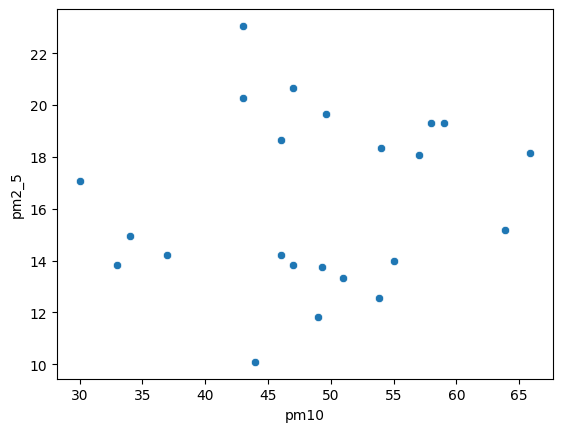

In [5]:
sns.scatterplot(x = pm10_c['pm10'], y = pm2_5['pm2_5']);

## SO2 y NO2

In [6]:
NO2 = pd.read_csv('Data//OAB - NO2 - La Ciudad.csv')
NO2['Periodo'] = pd.to_datetime(NO2['Periodo'], format='%Y').dt.year

In [7]:
SO2 = pd.read_csv('Data//OAB - SO2 - La Ciudad.csv')
SO2['Periodo'] = pd.to_datetime(SO2['Periodo'], format='%Y').dt.year

In [8]:
NO2.columns, SO2.columns

(Index(['Periodo', 'NO2ppb', 'Valor'], dtype='object'),
 Index(['Periodo', 'SO2ppb', 'Valor'], dtype='object'))

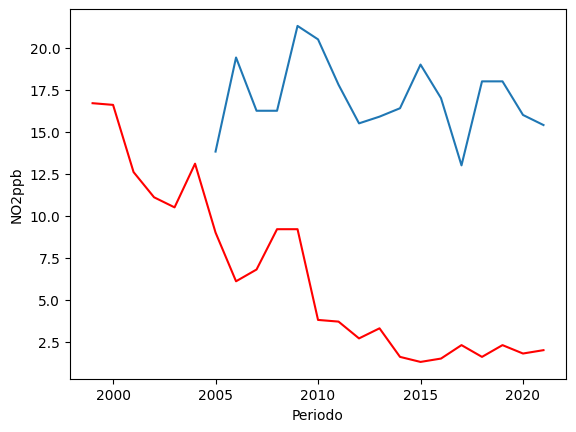

In [9]:
sns.lineplot(data =NO2, x = NO2['Periodo'], y = NO2['NO2ppb'])
sns.lineplot(data =SO2, x = 'Periodo', y = 'SO2ppb', color='r');

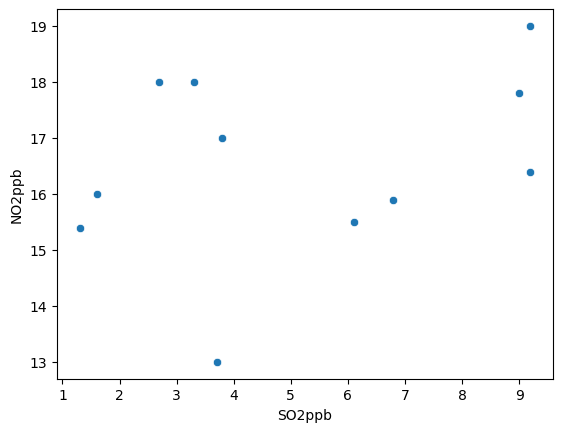

In [10]:
sns.scatterplot(x=SO2.tail(17)['SO2ppb'], y = NO2['NO2ppb']);

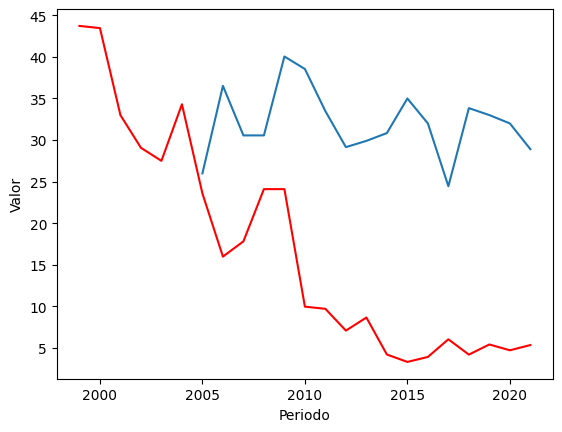

In [11]:
sns.lineplot(data =NO2, x = NO2['Periodo'], y = NO2['Valor'])
sns.lineplot(data =SO2, x = 'Periodo', y = 'Valor', color='r');

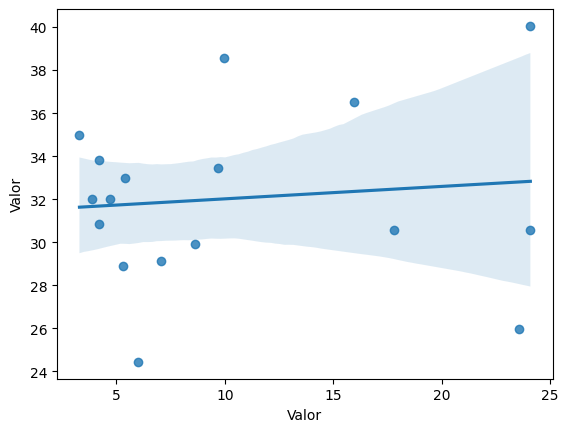

In [12]:
sns.regplot(x=SO2.tail(17)['Valor'], y = NO2['Valor']);

## pm10 y SO2

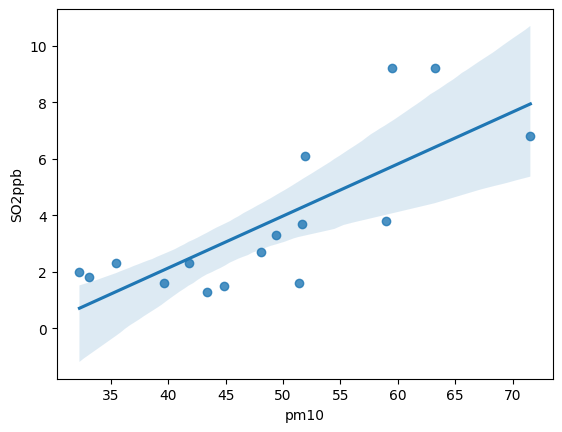

In [13]:
sns.regplot(x = pm10.groupby(pm10['Periodo'].dt.year).mean().iloc[:-1,:].reset_index(drop=True)['pm10'], 
                y = SO2.tail(16)['SO2ppb']);

## pm10 y NO2

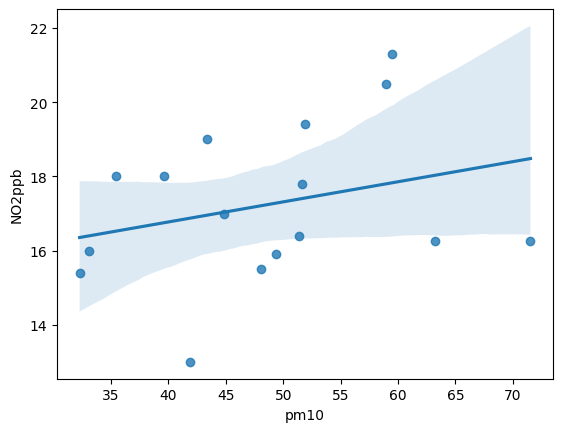

In [14]:
sns.regplot(x = pm10.groupby(pm10['Periodo'].dt.year).mean().iloc[:-1,:]['pm10'], 
            y = NO2.iloc[1:,:]['NO2ppb']);

## pm2_5 y SO2

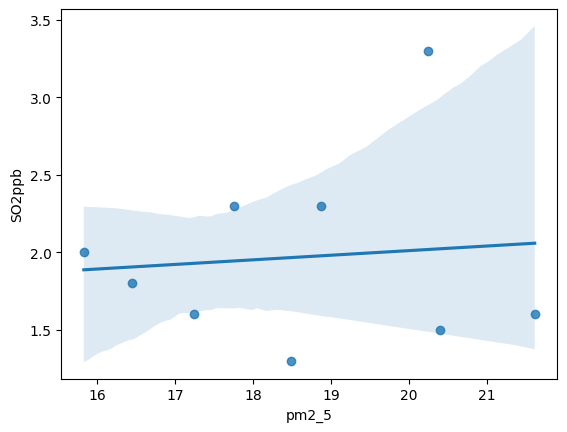

In [15]:
sns.regplot(x = pm2_5.groupby(pm2_5['Periodo'].dt.year).mean()['pm2_5'].iloc[:-1], 
            y = SO2.tail(9)['SO2ppb']);

## pm2_5 y NO2

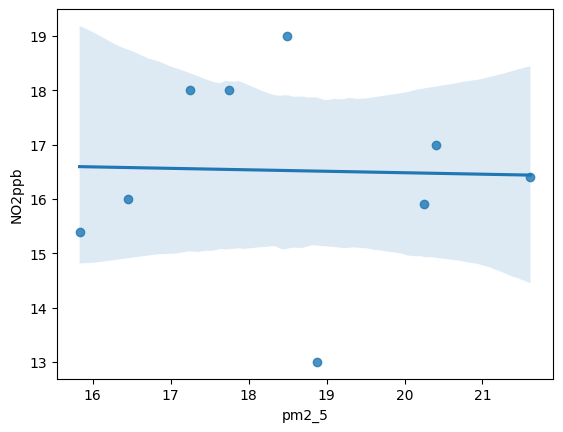

In [16]:
sns.regplot(x = pm2_5.groupby(pm2_5['Periodo'].dt.year).mean()['pm2_5'].iloc[:-1], 
            y = NO2.iloc[1:,:].iloc[7:,:]['NO2ppb']);

## Sibilancia > 60

In [17]:
sibilancia60 = pd.read_csv('Data//obs_sibilancia60.csv', encoding='latin', sep=';')
sibilancia60['Mujeres encuestadas'] = sibilancia60['Mujeres encuestadas'].astype(int)
distrito_sibilancia60 = sibilancia60[sibilancia60['Área'] == 'Distrito']
distrito_sibilancia60['Año'] = pd.to_datetime(distrito_sibilancia60['Año'], format='%Y').dt.year
distrito_sibilancia60['Hsibil'] = distrito_sibilancia60['Hombres con sibilancias'] / distrito_sibilancia60['Hombres encuestados']
distrito_sibilancia60['Msibil'] = distrito_sibilancia60['Mujeres con sibilancias'] / distrito_sibilancia60['Mujeres encuestadas']
distrito_sibilancia60['sibil'] = distrito_sibilancia60['Hsibil'] + distrito_sibilancia60['Msibil']
distrito_sibilancia60 = distrito_sibilancia60[['Régimen', 'Hsibil', 'Msibil', 'sibil', 'Año']]



distrito_sibilancia60

,Régimen,Hsibil,Msibil,sibil,Año
76,Contributivo,0.071429,0.075561,0.146989,2013
77,Subsidiado,0.108392,157.000000,157.108392,2013
78,No asegurado,0.000000,0.000000,0.000000,2013
79,Especial,0.000000,0.044444,0.044444,2013
156,Contributivo,0.143750,0.131102,0.274852,2014
157,Subsidiado,0.133588,0.104901,0.238489,2014
158,No asegurado,0.000000,0.250000,0.250000,2014
159,Especial,0.000000,0.184211,0.184211,2014
236,Contributivo,0.058419,0.067194,0.125613,2015
237,Subsidiado,0.081129,88.000000,88.081129,2015


In [18]:
distrito_sibilancia60.groupby('Año').sum()

,Hsibil,Msibil,sibil
Año,,,
2013,0.179820,157.120005,157.299825
2014,0.277338,0.670213,0.947551
2015,0.192180,88.170642,88.362822
2016,0.351839,0.292695,0.644534
2017,0.584713,0.261918,0.846631
2018,0.592176,112.231746,112.823922
2019,0.252721,103.213775,103.466496
2020,0.139813,0.247013,0.386826
2021,0.104395,0.069083,0.173478


In [19]:
sibilancia60[sibilancia60['Año'] == 2013].tail()

,Área,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Año
75,Ciudad Bolívar,Especial,0,0,0,0,2013
76,Distrito,Contributivo,19,64,266,847,2013
77,Distrito,Subsidiado,62,157,572,1,2013
78,Distrito,No asegurado,0,0,16,20,2013
79,Distrito,Especial,0,2,14,45,2013


In [20]:
sibilancia60[sibilancia60['Mujeres encuestadas'] < sibilancia60['Mujeres con sibilancias']]

,Área,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas,Año
77,Distrito,Subsidiado,62,157,572,1,2013
237,Distrito,Subsidiado,46,88,567,1,2015
477,Distrito,Subsidiado,65,112,656,1,2018
556,Distrito,Contributivo,41,103,542,1,2019


In [21]:
no_dis_sibilancia60 = sibilancia60[sibilancia60['Área'] != 'Distrito']
no_dis_sibilancia60 = no_dis_sibilancia60.groupby(['Año', 'Régimen'], axis =0).sum().reset_index()
no_dis_sibilancia60

,Año,Régimen,Hombres con sibilancias,Mujeres con sibilancias,Hombres encuestados,Mujeres encuestadas
0,2013,Contributivo,19,64,266,847
1,2013,Especial,0,2,14,45
2,2013,No asegurado,0,0,16,20
3,2013,Subsidiado,62,157,572,1276
4,2014,Contributivo,23,94,160,717
5,2014,Especial,0,7,5,38
6,2014,No asegurado,0,1,3,4
7,2014,Subsidiado,70,122,524,1163
8,2015,Contributivo,17,51,291,759
9,2015,Especial,1,3,19,29


In [22]:
sibilancia60 = pd.read_csv('Data//obs_sibilancia60.csv', encoding='latin', sep=';')
sibilancia60['Mujeres encuestadas'] = sibilancia60['Mujeres encuestadas'].astype(int)
no_dis_sibilancia60 = sibilancia60[sibilancia60['Área'] != 'Distrito']
distrito_sibilancia60 = no_dis_sibilancia60.groupby(['Año', 'Régimen'], axis =0).sum().reset_index()
distrito_sibilancia60['Año'] = pd.to_datetime(distrito_sibilancia60['Año'], format='%Y').dt.year
distrito_sibilancia60['Hsibil'] = distrito_sibilancia60['Hombres con sibilancias'] / distrito_sibilancia60['Hombres encuestados']
distrito_sibilancia60['Msibil'] = distrito_sibilancia60['Mujeres con sibilancias'] / distrito_sibilancia60['Mujeres encuestadas']
distrito_sibilancia60['sibil'] = distrito_sibilancia60['Hsibil'] + distrito_sibilancia60['Msibil']
distrito_sibilancia60 = distrito_sibilancia60[['Régimen', 'Hsibil', 'Msibil', 'sibil', 'Año']]

distrito_sibilancia60

,Régimen,Hsibil,Msibil,sibil,Año
0,Contributivo,0.071429,0.075561,0.146989,2013
1,Especial,0.000000,0.044444,0.044444,2013
2,No asegurado,0.000000,0.000000,0.000000,2013
3,Subsidiado,0.108392,0.123041,0.231432,2013
4,Contributivo,0.143750,0.131102,0.274852,2014
5,Especial,0.000000,0.184211,0.184211,2014
6,No asegurado,0.000000,0.250000,0.250000,2014
7,Subsidiado,0.133588,0.104901,0.238489,2014
8,Contributivo,0.058419,0.067194,0.125613,2015
9,Especial,0.052632,0.103448,0.156080,2015


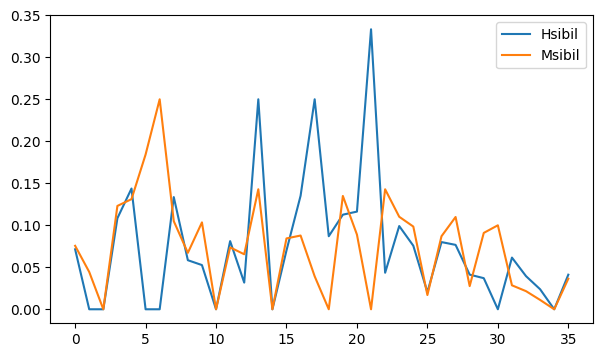

In [23]:
distrito_sibilancia60[['Hsibil', 'Msibil']].plot.line(figsize=(7,4));

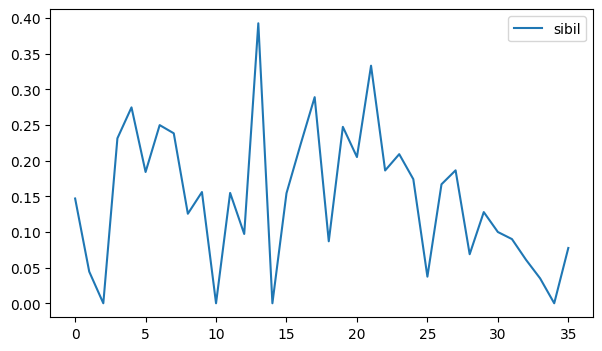

In [24]:
distrito_sibilancia60[['sibil']].plot.line(figsize=(7,4));

In [25]:
distrito_sibilancia60.columns

Index(['Régimen', 'Hsibil', 'Msibil', 'sibil', 'Año'], dtype='object')

In [26]:
dengue = pd.read_csv('Data//obs_caso-notificados-dengue.csv', encoding='latin', sep=';')
dengue

,Año,Mes,Casos Dengue,ENOS C
0,2009,Enero,127,Niña
1,2009,Febrero,36,Niña
2,2009,Marzo,26,Niña
3,2009,Abril,52,Neutro
4,2009,Mayo,37,Neutro
...,...,...,...,...
151,2021,Agosto,40,Niña
152,2021,Septiembre,31,Niña
153,2021,Octubre,29,Niña
154,2021,Noviembre,53,Niña


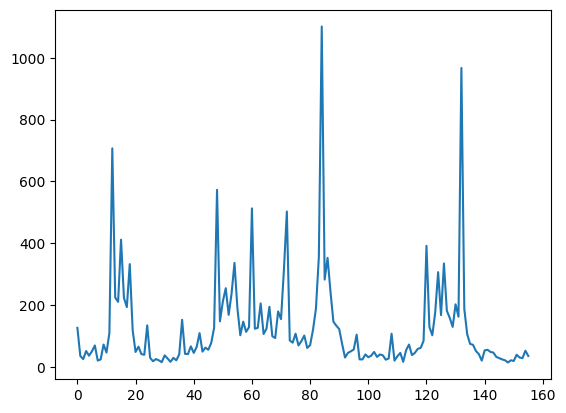

In [28]:
dengue['Casos Dengue'].plot(kind='line');

In [29]:
dengue['Mes'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype=object)

In [32]:
meses = dict()
for i,j in enumerate(dengue['Mes'].unique()):
    meses[j] = i+1

meses

{'Enero': 1,
 'Febrero': 2,
 'Marzo': 3,
 'Abril': 4,
 'Mayo': 5,
 'Junio': 6,
 'Julio': 7,
 'Agosto': 8,
 'Septiembre': 9,
 'Octubre': 10,
 'Noviembre': 11,
 'Diciembre': 12}

In [33]:
dengue['month'] = dengue['Mes'].map(meses)
dengue

,Año,Mes,Casos Dengue,ENOS C,month
0,2009,Enero,127,Niña,1
1,2009,Febrero,36,Niña,2
2,2009,Marzo,26,Niña,3
3,2009,Abril,52,Neutro,4
4,2009,Mayo,37,Neutro,5
...,...,...,...,...,...
151,2021,Agosto,40,Niña,8
152,2021,Septiembre,31,Niña,9
153,2021,Octubre,29,Niña,10
154,2021,Noviembre,53,Niña,11


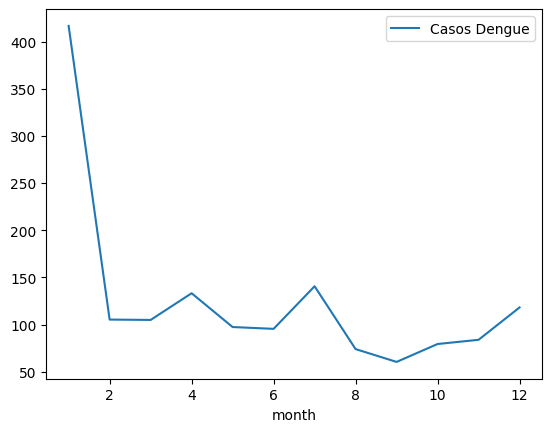

In [38]:
dengue[['Casos Dengue', 'month']].groupby('month').mean().plot(kind='line');

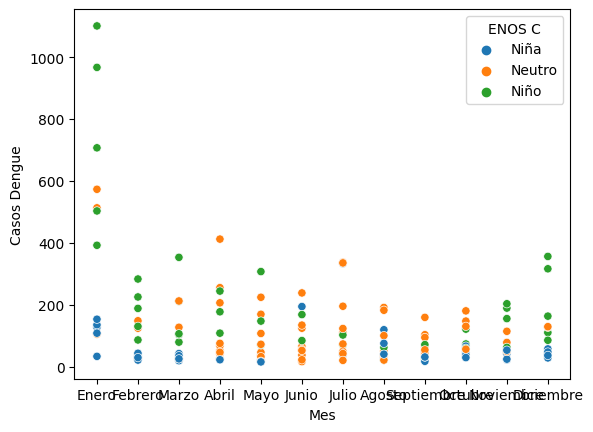

In [41]:
sns.scatterplot(data=dengue, x='Mes', y='Casos Dengue', hue='ENOS C');

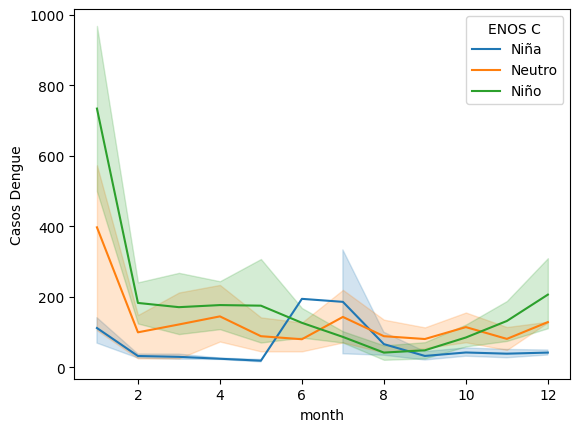

In [43]:
sns.lineplot(data=dengue, x='month', y='Casos Dengue', hue='ENOS C');

In [50]:
ausentismo = pd.read_csv('Data//osb_ausentismo.csv', encoding='latin', sep=';')
ausentismo

,Área,Régimen,Hombre que reportó ausentismo escolar,Mujer que reportó ausentismo escolar,total hombres encuestados,Hotal mujeres encuestadas,Año
0,Usaquén,Contributivo,106,115,349.0,373.0,2013
1,Usaquén,Subsidiado,36,31,129.0,132.0,2013
2,Usaquén,No asegurado,7,2,19.0,17.0,2013
3,Usaquén,Especial,10,9,26.0,25.0,2013
4,Chapinero,Contributivo,12,7,126.0,150.0,2013
...,...,...,...,...,...,...,...
715,Ciudad Bolívar,Especial,1,0,14.0,11.0,2021
716,Distrito,Contributivo,51,52,2240.0,2139.0,2021
717,Distrito,Subsidiado,15,5,816.0,763.0,2021
718,Distrito,No asegurado,0,1,54.0,42.0,2021


In [45]:
ausentismo.columns

Index(['Área', 'Régimen', 'Hombre que reportó ausentismo escolar',
       'Mujer que reportó ausentismo escolar', 'total hombres encuestados',
       'Hotal mujeres encuestadas', 'Año'],
      dtype='object')

In [51]:
ausentismo_bog = ausentismo.drop('Área', axis=1).groupby(['Régimen', 'Año']).sum()
ausentismo_bog

Hombre que reportó ausentismo escolar  \
Régimen       Año                                           
Contributivo  2013                                   1120   
              2014                                   1360   
              2015                                   1602   
              2016                                   1522   
              2017                                   1624   
              2018                                   1266   
              2019                                    728   
              2020                                    136   
              2021                                    102   
Especial      2013                                     46   
              2014                                     66   
              2015                                     62   
              2016                                     56   
              2017                                     90   
              2018                                    100   
              2019                                     32   
              2020                                     10   
              2021                                      6   
No asegurado  2013                                     42   
              2014                                     36   
              2015                                     34   
              2016                                     34   
              2017                                     56   
              2018                                     76   
              2019                                     54   
              2020                                      4   
              2021                                      0   
Subsidiado    2013                                    456   
              2014                                    598   
              2015                                    676   
              2016                                    488   
              2017                                    692   
              2018                                    508   
              2019                                    278   
              2020                                     36   
              2021                                     30   

                    Mujer que reportó ausentismo escolar  \
Régimen       Año                                          
Contributivo  2013                                   964   
              2014                                  1246   
              2015                                  1418   
              2016                                  1374   
              2017                                  1652   
              2018                                  1138   
              2019                                   650   
              2020                                   132   
              2021                                   104   
Especial      2013                                    50   
              2014                                    50   
              2015                                    60   
              2016                                    72   
              2017                                    80   
              2018                                    82   
              2019                                    42   
              2020                                     6   
              2021                                     4   
No asegurado  2013                                    32   
              2014                                    30   
              2015                                    30   
              2016                                    32   
              2017                                    64   
              2018                                    56   
              2019                                    40   
              2020                                     8   
              2021   

In [57]:
ausentismo_bog = ausentismo.drop('Área', axis=1).groupby(['Régimen', 'Año']).sum()
ausentismo_bog['prop_h'] = ausentismo_bog['Hombre que reportó ausentismo escolar'] / ausentismo_bog['total hombres encuestados']
ausentismo_bog['prop_m'] = ausentismo_bog['Mujer que reportó ausentismo escolar'] / ausentismo_bog['Hotal mujeres encuestadas']
ausentismo_bog = ausentismo_bog.reset_index(drop=False)
ausentismo_bog

,Régimen,Año,Hombre que reportó ausentismo escolar,Mujer que reportó ausentismo escolar,total hombres encuestados,Hotal mujeres encuestadas,prop_h,prop_m
0,Contributivo,2013,1120,964,3314.311,3162.159,0.337928,0.304855
1,Contributivo,2014,1360,1246,3702.699,3600.597,0.367300,0.346054
2,Contributivo,2015,1602,1418,4086.082,3865.862,0.392063,0.366800
3,Contributivo,2016,1522,1374,3454.451,3093.090,0.440591,0.444216
4,Contributivo,2017,1624,1652,3589.586,3569.566,0.452420,0.462801
5,Contributivo,2018,1266,1138,3290.287,3119.116,0.384769,0.364847
6,Contributivo,2019,728,650,2361.359,2179.177,0.308297,0.298278
7,Contributivo,2020,136,132,3970.000,4070.000,0.034257,0.032432
8,Contributivo,2021,102,104,4480.000,4278.000,0.022768,0.024310
9,Especial,2013,46,50,292.000,278.000,0.157534,0.179856


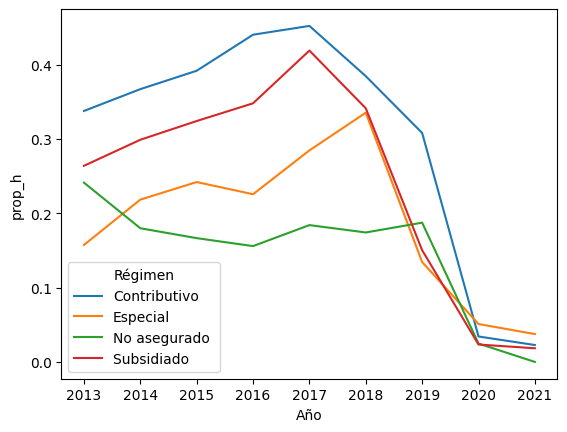

In [58]:
sns.lineplot(data=ausentismo_bog, x='Año', y='prop_h', hue='Régimen');

In [119]:
ausentismo_bog['global'] = ((ausentismo_bog['Hombre que reportó ausentismo escolar'] + 
                            ausentismo_bog['Mujer que reportó ausentismo escolar']) / 
                            (ausentismo_bog['total hombres encuestados'] + 
                             ausentismo_bog['Hotal mujeres encuestadas']))
ausentismo_bog

,Régimen,Año,Hombre que reportó ausentismo escolar,Mujer que reportó ausentismo escolar,total hombres encuestados,Hotal mujeres encuestadas,prop_h,prop_m,global
0,Contributivo,2013,1120,964,3314.311,3162.159,0.337928,0.304855,0.321780
1,Contributivo,2014,1360,1246,3702.699,3600.597,0.367300,0.346054,0.356825
2,Contributivo,2015,1602,1418,4086.082,3865.862,0.392063,0.366800,0.379781
3,Contributivo,2016,1522,1374,3454.451,3093.090,0.440591,0.444216,0.442303
4,Contributivo,2017,1624,1652,3589.586,3569.566,0.452420,0.462801,0.457596
5,Contributivo,2018,1266,1138,3290.287,3119.116,0.384769,0.364847,0.375074
6,Contributivo,2019,728,650,2361.359,2179.177,0.308297,0.298278,0.303488
7,Contributivo,2020,136,132,3970.000,4070.000,0.034257,0.032432,0.033333
8,Contributivo,2021,102,104,4480.000,4278.000,0.022768,0.024310,0.023521
9,Especial,2013,46,50,292.000,278.000,0.157534,0.179856,0.168421


In [59]:
similar_influenza = pd.read_csv('Data//osb_esi-irag.csv', encoding='latin', sep=';')
similar_influenza

,Año,Mes,Casos ESI-IRAG,Lluvia Acumulada,Temporada
0,2009,Enero,55,"476,90",Lluvioso
1,2009,Febrero,74,"796,70",Lluvioso
2,2009,Marzo,149,"1092,30",Lluvioso
3,2009,Abril,303,"686,00",Lluvioso
4,2009,Mayo,264,"243,40",NaN
...,...,...,...,...,...
151,2021,Agosto,170,"1140,6",Lluvioso
152,2021,Septiembre,181,"628,2",NaN
153,2021,Octubre,170,"1936,4",Lluvioso
154,2021,Noviembre,151,"1646,6",Lluvioso


In [63]:
similar_influenza['month'] = similar_influenza['Mes'].map(meses)
similar_influenza['Temporada'] = similar_influenza['Temporada'].fillna('No lluvioso')
similar_influenza

,Año,Mes,Casos ESI-IRAG,Lluvia Acumulada,Temporada,month
0,2009,Enero,55,"476,90",Lluvioso,1
1,2009,Febrero,74,"796,70",Lluvioso,2
2,2009,Marzo,149,"1092,30",Lluvioso,3
3,2009,Abril,303,"686,00",Lluvioso,4
4,2009,Mayo,264,"243,40",No lluvioso,5
...,...,...,...,...,...,...
151,2021,Agosto,170,"1140,6",Lluvioso,8
152,2021,Septiembre,181,"628,2",No lluvioso,9
153,2021,Octubre,170,"1936,4",Lluvioso,10
154,2021,Noviembre,151,"1646,6",Lluvioso,11


In [67]:
similar_influenza['Lluvia Acumulada'] = similar_influenza['Lluvia Acumulada'].replace(',','.', regex=True)
similar_influenza['Lluvia Acumulada'] = similar_influenza['Lluvia Acumulada'].astype(float)
similar_influenza

,Año,Mes,Casos ESI-IRAG,Lluvia Acumulada,Temporada,month
0,2009,Enero,55,476.9,Lluvioso,1
1,2009,Febrero,74,796.7,Lluvioso,2
2,2009,Marzo,149,1092.3,Lluvioso,3
3,2009,Abril,303,686.0,Lluvioso,4
4,2009,Mayo,264,243.4,No lluvioso,5
...,...,...,...,...,...,...
151,2021,Agosto,170,1140.6,Lluvioso,8
152,2021,Septiembre,181,628.2,No lluvioso,9
153,2021,Octubre,170,1936.4,Lluvioso,10
154,2021,Noviembre,151,1646.6,Lluvioso,11


In [68]:
similar_influenza['casos_lluvia'] = similar_influenza['Casos ESI-IRAG'] / similar_influenza['Lluvia Acumulada']
similar_influenza

,Año,Mes,Casos ESI-IRAG,Lluvia Acumulada,Temporada,month,casos_lluvia
0,2009,Enero,55,476.9,Lluvioso,1,0.115328
1,2009,Febrero,74,796.7,Lluvioso,2,0.092883
2,2009,Marzo,149,1092.3,Lluvioso,3,0.136409
3,2009,Abril,303,686.0,Lluvioso,4,0.441691
4,2009,Mayo,264,243.4,No lluvioso,5,1.084634
...,...,...,...,...,...,...,...
151,2021,Agosto,170,1140.6,Lluvioso,8,0.149044
152,2021,Septiembre,181,628.2,No lluvioso,9,0.288125
153,2021,Octubre,170,1936.4,Lluvioso,10,0.087792
154,2021,Noviembre,151,1646.6,Lluvioso,11,0.091704


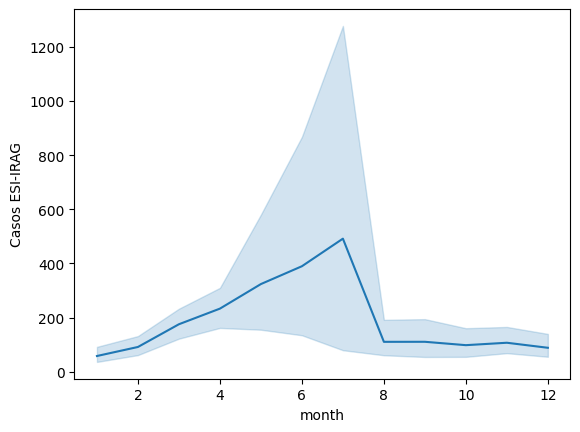

In [89]:
sns.lineplot(data=similar_influenza, x='month', y='Casos ESI-IRAG');

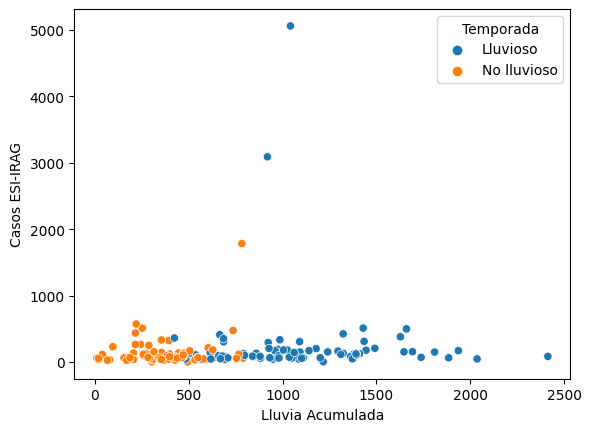

In [76]:
sns.scatterplot(data=similar_influenza, y='Casos ESI-IRAG', x='Lluvia Acumulada', hue='Temporada');

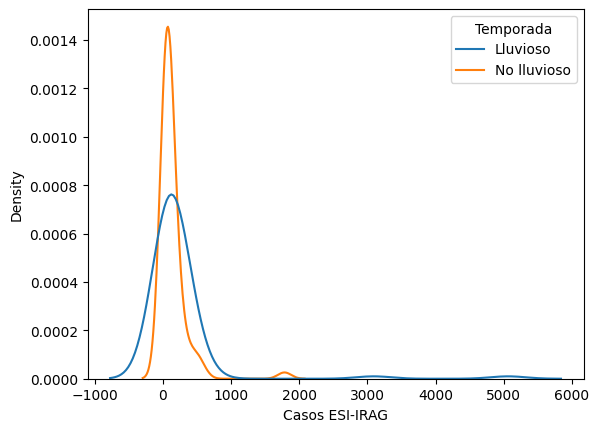

In [80]:
sns.kdeplot(data=similar_influenza, x='Casos ESI-IRAG', hue='Temporada');

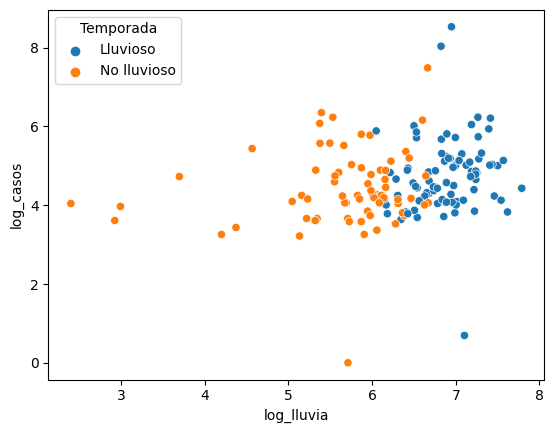

In [77]:
import numpy as np
similar_influenza['log_lluvia'] = np.log(similar_influenza['Lluvia Acumulada'])
similar_influenza['log_casos'] = np.log(similar_influenza['Casos ESI-IRAG'])
sns.scatterplot(data=similar_influenza, y='log_casos', x='log_lluvia', hue='Temporada');

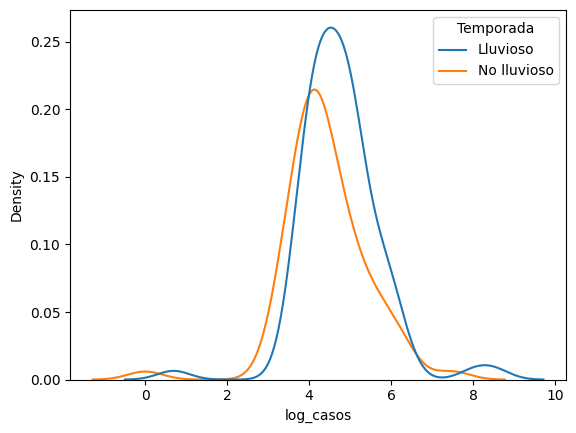

In [79]:
sns.kdeplot(data=similar_influenza, x='log_casos', hue='Temporada');

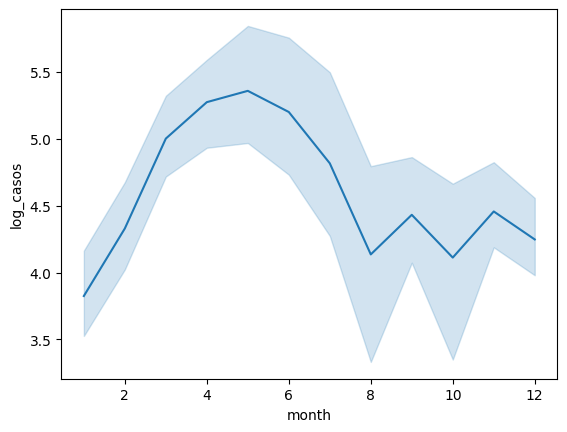

In [90]:
sns.lineplot(data=similar_influenza, x='month', y='log_casos');

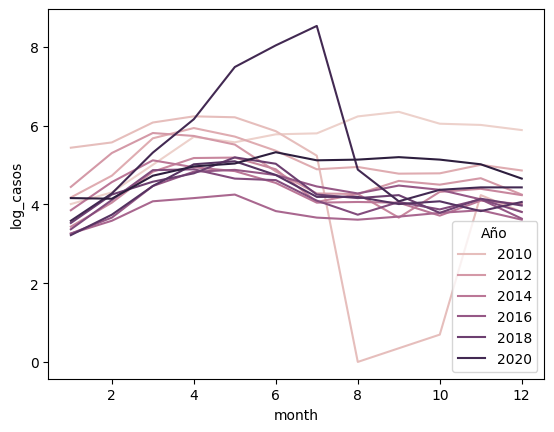

In [91]:
sns.lineplot(data=similar_influenza, x='month', y='log_casos', hue='Año');

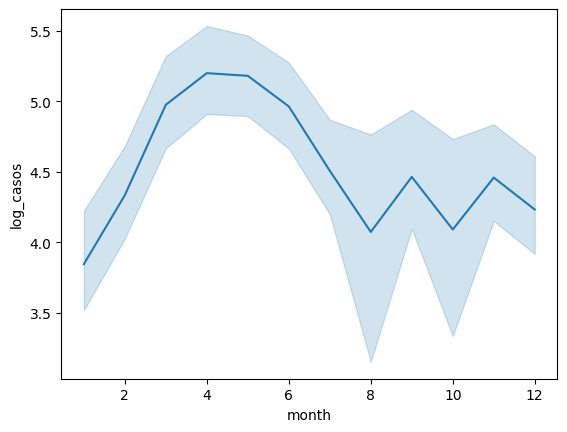

In [98]:
sns.lineplot(data=similar_influenza[similar_influenza['Año'] != 2020], x='month', y='log_casos');

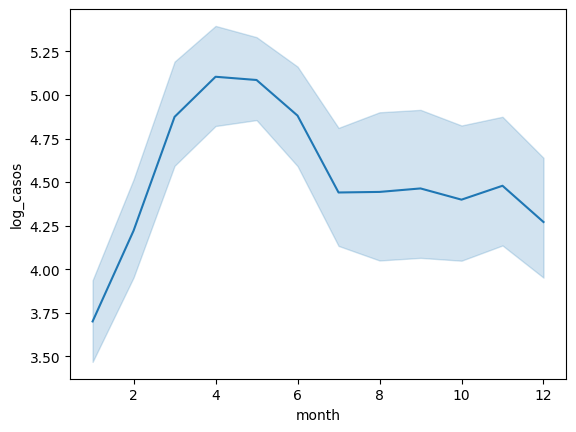

In [102]:
sns.lineplot(data=similar_influenza[(similar_influenza['Año'] != 2010) & (similar_influenza['Año'] != 2020)], 
             x='month', 
             y='log_casos');

In [103]:
quejas = pd.read_csv('Data//osb_saludamb-quejas.csv', encoding='latin', sep=';')
quejas

,Tema Queja,Año,Área,Número de quejas,Proporción
0,Contaminación por aire,2013,Usaquén,3,"3,1"
1,Contaminación por aire,2013,Chapinero,4,"4,2"
2,Contaminación por aire,2013,Santa Fe,0,0
3,Contaminación por aire,2013,San Cristóbal,0,0
4,Contaminación por aire,2013,Usme,0,0
...,...,...,...,...,...
895,Radiaciones electromagnéticas,2021,Puente Aranda,0,0
896,Radiaciones electromagnéticas,2021,La Candelaria,0,0
897,Radiaciones electromagnéticas,2021,Rafael Uribe Uribe,0,0
898,Radiaciones electromagnéticas,2021,Ciudad Bolívar,0,0


In [104]:
quejas['Proporción'] = quejas['Proporción'].replace(',','.', regex=True)
quejas['Proporción'] = quejas['Proporción'].astype(float)
quejas

,Tema Queja,Año,Área,Número de quejas,Proporción
0,Contaminación por aire,2013,Usaquén,3,3.1
1,Contaminación por aire,2013,Chapinero,4,4.2
2,Contaminación por aire,2013,Santa Fe,0,0.0
3,Contaminación por aire,2013,San Cristóbal,0,0.0
4,Contaminación por aire,2013,Usme,0,0.0
...,...,...,...,...,...
895,Radiaciones electromagnéticas,2021,Puente Aranda,0,0.0
896,Radiaciones electromagnéticas,2021,La Candelaria,0,0.0
897,Radiaciones electromagnéticas,2021,Rafael Uribe Uribe,0,0.0
898,Radiaciones electromagnéticas,2021,Ciudad Bolívar,0,0.0


In [114]:
quejas_bog = quejas.drop('Área', axis=1).groupby(['Tema Queja', 'Año']).sum()
quejas_bog = quejas_bog.drop('Proporción', axis=1).sort_values(by=['Año', 'Tema Queja'])
quejas_bog = quejas_bog.reset_index(drop=False)
quejas_bog

,Tema Queja,Año,Número de quejas
0,Contaminación por aire,2013,192
1,Contaminación por ruido,2013,168
2,Humo de tabaco,2013,74
3,Olores ofensivos,2013,56
4,Radiaciones electromagnéticas,2013,156
5,Contaminación por aire,2014,176
6,Contaminación por ruido,2014,210
7,Humo de tabaco,2014,82
8,Olores ofensivos,2014,260
9,Radiaciones electromagnéticas,2014,128


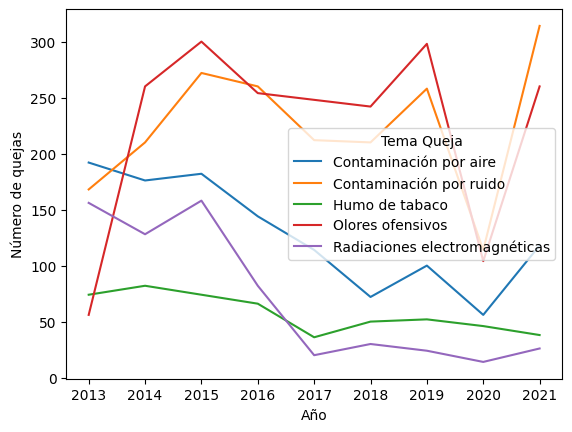

In [117]:
sns.lineplot(data= quejas_bog, x='Año', y='Número de quejas', hue='Tema Queja');